In [48]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import json

plt.style.use('seaborn-v0_8-bright')
plt.style.use('ggplot')

o_df = pd.read_csv("tmdb_5000_movies.csv")

print(o_df.head(5))

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [50]:
o_df.drop(['homepage', 'tagline'], axis=1, inplace=True)
o_df.dropna(inplace=True)

In [52]:
columns_to_remove_zero = ['runtime', 'vote_average','vote_count','popularity']  

for col in columns_to_remove_zero:
    o_df = o_df[o_df[col] != 0]

# df[df==0].count() 

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

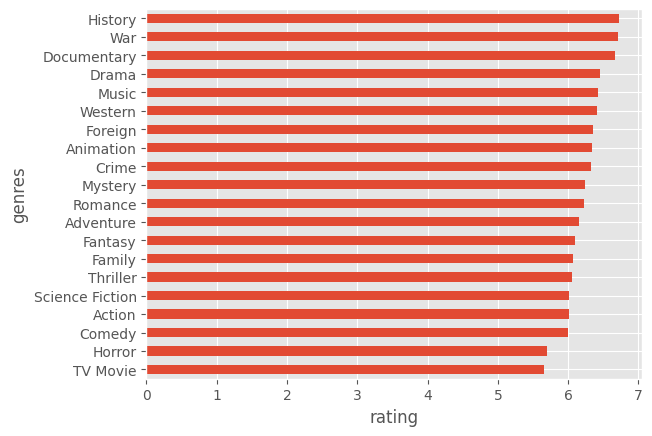

In [60]:
# display mean rating across different genres
df = o_df

df = df[df['vote_average'] != 0]

def f(t):
  s = t['genres']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

genre_split = pd.DataFrame.apply(df, f, axis=1)
df = pd.concat([df, genre_split], axis=1)
df_g = df.melt(id_vars=['id', 'title', 'vote_average'],
                value_vars=genre_split.columns)

average_rating = df_g.groupby(['value'])['vote_average'].mean()
average_rating = average_rating.sort_values()
fig, axs  = plt.subplots()
average_rating.plot(y='vote_average', ax=axs, kind='barh')
axs.set_xlabel('rating')
axs.set_ylabel('genres')
plt.show()

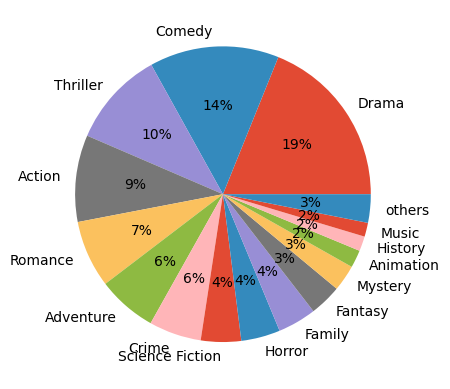

In [11]:
df = o_df

def f(t):
  s = t['genres']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

genre_split = pd.DataFrame.apply(df, f, axis=1)
df = pd.concat([df, genre_split], axis=1)
df = df.melt(id_vars=['id', 'title', 'vote_average'],
                value_vars=genre_split.columns)

average_rating = df.groupby(['value'])['vote_average'].count().rename("count")
average_rating = pd.DataFrame(average_rating, columns=['count'])
average_rating = average_rating.sort_values(by='count', ascending=False)
n = 15
average_rating_1 = average_rating.head(n)
average_rating_2 = average_rating[n:]
average_rating_2 = pd.DataFrame(average_rating_2['count'].sum(), index=['others'], columns=['count'])
average_rating = pd.concat([average_rating_1, average_rating_2])
# print(average_rating)
# print(average_rating.loc[average_rating.groupby('count', group_keys=False)['count'].idxmin()])

# average_rating = average_rating.groupby()
fig, axs  = plt.subplots()
average_rating.plot(y='count', ax=axs, kind='pie',autopct='%1.0f%%', legend=False)
axs.set_ylabel('')
axs.set_xlabel('')
plt.show()

# Finding the correlation and linear regression between correlated attributes to find the Revenue

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from seaborn import histplot

tmdb_data = o_df.select_dtypes(include=[int, float])
tmdb_data.replace(0, pd.NA, inplace=True)
tmdb_data = tmdb_data.dropna()
tmdb_data = tmdb_data.drop(columns=["id"])

# Identify dependencies between attributes (e.g., using correlation analysis)
correlation_matrix = tmdb_data.corr()

# Print correlation matrix
print("Correlation matrix:")
correlation_matrix

Correlation matrix:


,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.431744,0.705306,0.229712,-0.035757,0.539997
popularity,0.431744,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.749005,0.756143,0.258101,0.380825,1.000000


In [18]:
from sklearn.model_selection import train_test_split
# Define features and target variable
X = tmdb_data.drop(columns=["revenue", "vote_average", "runtime"])
y = tmdb_data["revenue"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Train a machine learning model to calculate feature importance
model = RandomForestRegressor()
model.fit(X, y)

# Calculate feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
})


# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Print the rank of attributes
print("Rank of attributes:")
feature_importance_df

Rank of attributes:


,Feature,Importance
2,vote_count,0.605030
0,budget,0.293653
1,popularity,0.101317


In [46]:
from sklearn.metrics import mean_squared_error, r2_score
# Initialize linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x_train, y_train)

# Get the coefficients (slopes) of the linear regression equation
coefficients = model.coef_

tmdb_data['predicted_revenue'] = 0
print("Coefficients after linear regerssion")

x_test['predicted_revenue'] = 0


for i, column in enumerate(x_test.columns):
    if column == 'predicted_revenue':
        continue
    print(f"{column}: {coefficients[i]}")
    x_test['predicted_revenue'] = x_test['predicted_revenue'] + x_test[column] * coefficients[i]


mse = mean_squared_error(y_test, x_test['predicted_revenue'])
r2 = r2_score(y_test, x_test['predicted_revenue'])
print("Mean Square Error: ", mse)
print("R-Square", r2)

# Print the coefficients for each attribute
for i, column in enumerate(X.columns):
    print(f"{column}: {coefficients[i]}")
    tmdb_data['predicted_revenue'] = tmdb_data['predicted_revenue'] + tmdb_data[column] * coefficients[i]


tmdb_data[['predicted_revenue', 'revenue']]

Coefficients after linear regerssion
budget: 1.6828141315484793
popularity: 474233.6297551938
vote_count: 57565.36917662545
Mean Square Error:  1.8127880933438428e+16
R-Square 0.6484653294499508
budget: 1.6828141315484793
popularity: 474233.6297551938
vote_count: 57565.36917662545


,predicted_revenue,revenue
0,1149440863.653456,2787965087
1,829846054.106652,961000000
2,720298084.896881,880674609
3,998156362.556485,1084939099
4,580632176.616845,284139100
...,...,...
4773,52872767.476038,3151130
4788,8511875.50174,6000000
4792,3761022.155764,99000
4796,48943205.873559,424760


In [45]:
x_test
mse

,budget,popularity,vote_count,predicted_revenue
1581,53000000,28.350529,1317,178447514.450835
351,90000000,63.429157,4339,431309648.053163
1540,30000000,36.432598,1344,145129843.310791
400,85000000,80.316463,4663,449555285.429814
196,130000000,68.757242,1918,361783211.627686
...,...,...,...,...
2324,16500000,36.15716,1013,103227093.374911
367,80000000,18.69984,392,166058848.240157
137,150000000,51.247321,1880,384948216.837387
4193,1700000,18.828683,236,25375405.831916


In [47]:
tmdb_data.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count,predicted_revenue
budget,1.000000,0.431744,0.705306,0.229712,-0.035757,0.539997,0.844817
popularity,0.431744,1.000000,0.602122,0.182388,0.288189,0.749005,0.739684
revenue,0.705306,0.602122,1.000000,0.233236,0.188014,0.756143,0.834797
runtime,0.229712,0.182388,0.233236,1.000000,0.386199,0.258101,0.276765
vote_average,-0.035757,0.288189,0.188014,0.386199,1.000000,0.380825,0.222985
vote_count,0.539997,0.749005,0.756143,0.258101,0.380825,1.000000,0.901964
predicted_revenue,0.844817,0.739684,0.834797,0.276765,0.222985,0.901964,1.000000


<Axes: xlabel='revenue', ylabel='Count'>

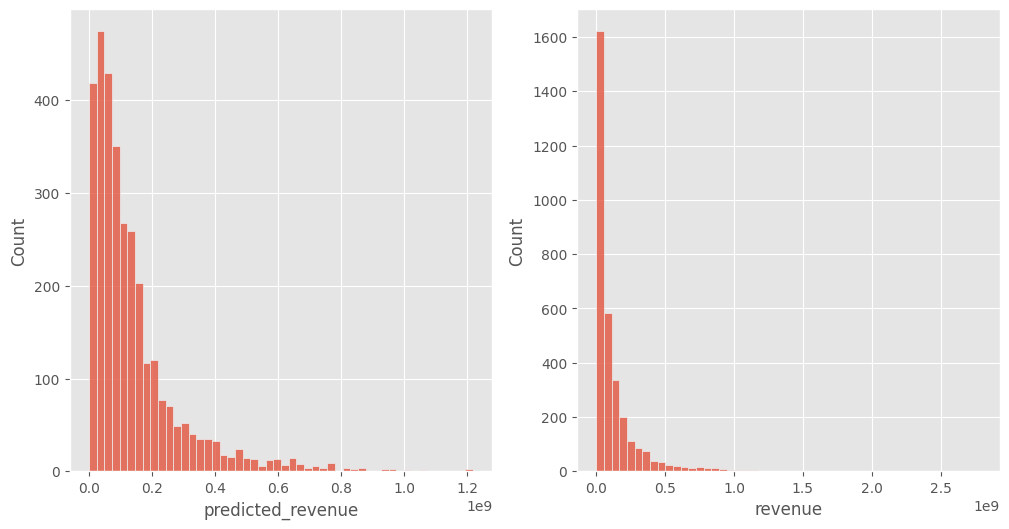

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

histplot(tmdb_data["predicted_revenue"], bins=50, ax=axes[0])
histplot(tmdb_data["revenue"], bins=50, ax=axes[1])

C:\Users\rhyth\AppData\Local\Temp\ipykernel_10140\911878658.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['year'] < 2015][df['year'] != 0]


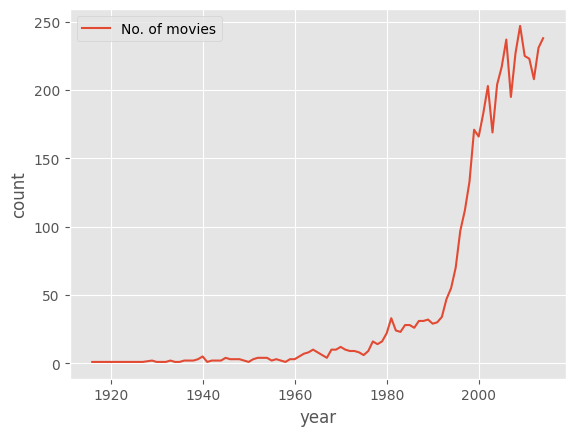

In [14]:
df = o_df
def f2(row):
  if (type(row['release_date'])) == str:
    return pd.Series([int(row['release_date'][:4])], index=['year'])
  else:
    return pd.Series([0], index=['year'])

year = df.apply(f2, axis=1)
df = pd.concat([df, year], axis=1)

df = df[df['year'] < 2015][df['year'] != 0]


year_count = df.groupby(['year']).count()
fig, axs  = plt.subplots()
year_count.plot(y='id', ax=axs, label='No. of movies')
axs.set_ylabel('count')
plt.show()


C:\Users\rhyth\AppData\Local\Temp\ipykernel_19012\272388174.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_year = df.groupby(pd.cut(df['year'], range(1910, 2020, 10)))['vote_average'].mean()


year
(1910, 1920]    7.400000
(1920, 1930]    6.740000
(1930, 1940]    6.968421
(1940, 1950]    6.909524
(1950, 1960]    7.165517
(1960, 1970]    6.863750
(1970, 1980]    6.756303
(1980, 1990]    6.347719
(1990, 2000]    6.184262
(2000, 2010]    6.068818
Name: vote_average, dtype: float64


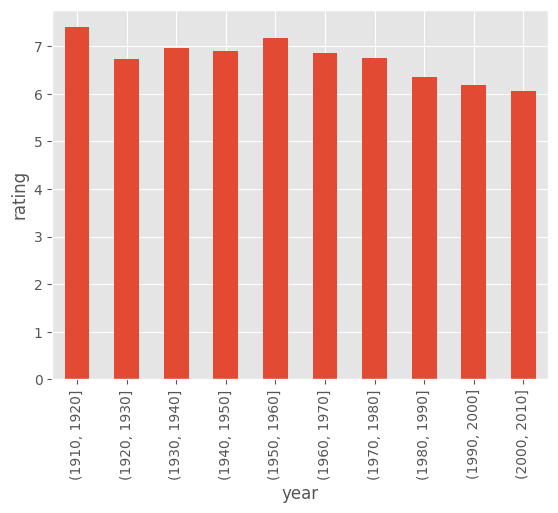

In [6]:
df = o_df
def f3(row):
  if (type(row['release_date'])) == str:
    return pd.Series([int(row['release_date'][:4])], index=['year'])
  else:
    return pd.Series([row['release_date']], index=['year'])

year = df.apply(f3, axis=1)

df = pd.concat([df, year], axis=1)

average_rating_year = df.groupby(pd.cut(df['year'], range(1910, 2020, 10)))['vote_average'].mean()
print(average_rating_year)
fig, axs  = plt.subplots()
average_rating_year.plot(kind='bar')
axs.set_ylabel('rating')
plt.show()


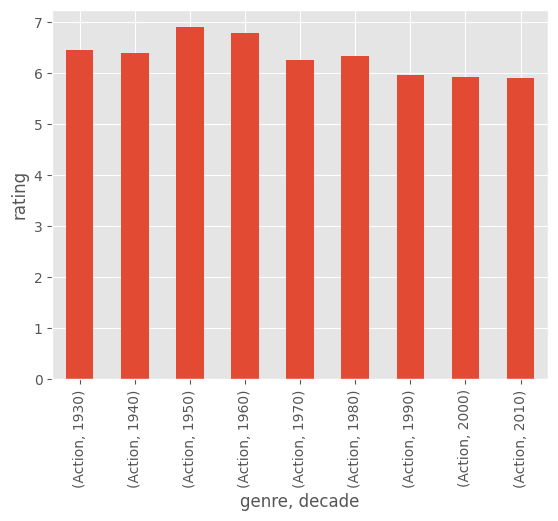

In [7]:
genre = "Action"

df = o_df

def f3(row):
  if (type(row['release_date'])) == str:
    return pd.Series([row['release_date'][:3] + '0'], index=['decade'])
  else:
    return pd.Series([row['release_date']], index=['decade'])

def f(t):
  s = t['genres']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

genre_split = pd.DataFrame.apply(df, f, axis=1)
decade = df.apply(f3, axis=1)

df = pd.concat([df, decade, genre_split], axis=1)
df = df.melt(id_vars=['id', 'title', 'vote_average', 'decade'],
                value_vars=genre_split.columns)

df = df[df['value'] == genre]

average_rating_year = df.groupby(['value', 'decade'])\
  ['vote_average'].mean()

fig, axs  = plt.subplots()
average_rating_year.plot(y='vote_average', ax=axs, kind='bar')
axs.set_ylabel('rating')
axs.set_xlabel('genre, decade')
plt.show()

C:\Users\rhyth\AppData\Local\Temp\ipykernel_10916\342138677.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_rating_range = df.groupby(pd.cut(df['vote_average'], range(11))).count()


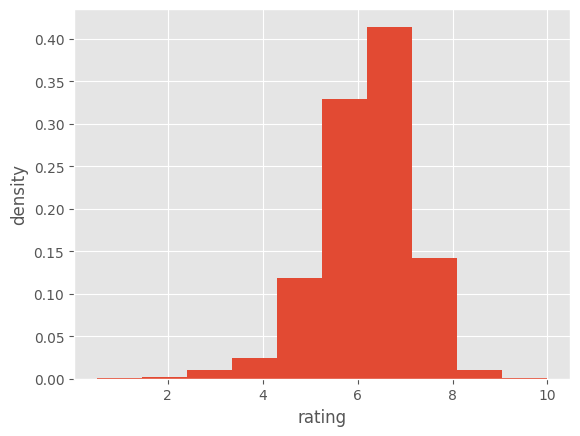

In [56]:
df = o_df
df = df[df['vote_average'] != 0]
count_rating_range = df.groupby(pd.cut(df['vote_average'], range(11))).count()

fig, axs  = plt.subplots()
df['vote_average'].hist(density=True)
axs.set_ylabel('density')
axs.set_xlabel('rating')
plt.show()


2562


Text(0.5, 0, 'release date')

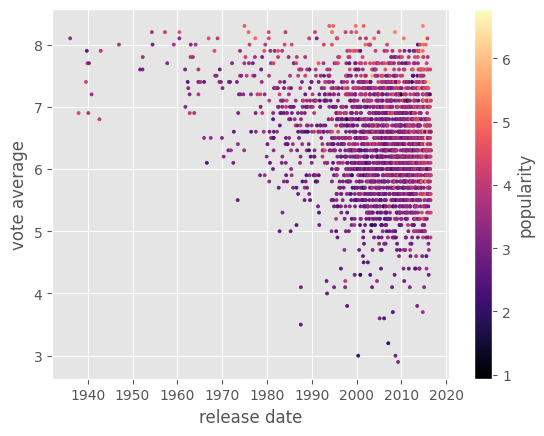

In [36]:
df = o_df
df = df[df['vote_average'] != 0]
df = df.sort_values(by =['vote_average'])[10:-10]
df = df.sort_values('release_date')[10:-10]
df['release_date'] = df['release_date'].apply(pd.to_datetime)
df = df[df['vote_count'] > 200]
print(len(df))

fig, g= plt.subplots()
t = g.scatter(x=df['release_date'], y=df['vote_average'], s=5, c=np.log1p(df['popularity']), cmap='magma')
r = fig.colorbar(t, ax=g)
r.set_label('popularity')
g.set_ylabel('vote average')
g.set_xlabel('release date')

C:\Users\rhyth\AppData\Local\Temp\ipykernel_10916\907599603.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df = df.groupby(pd.Grouper(key='release_date', freq='5Y'))['popularity'].apply(lambda a: a.sort_values()[10:-10].mean())


Text(0.5, 0, 'time')

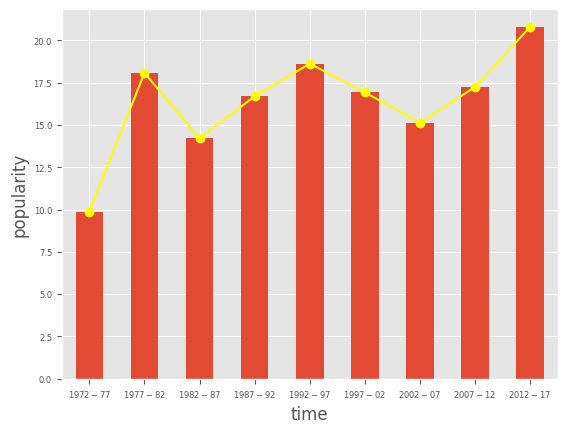

In [47]:
# corelation between popularity and release date
from datetime import datetime
df = o_df
# df['popularity'] = np.log1p(df['popularity'])
df['release_date'] = df['release_date'].apply(pd.to_datetime)
df = df[df['release_date'] > datetime.fromisoformat('1966-12-31')]
df = df[df['popularity'] != 0]
# print(len(k))
df['release_date'] = df['release_date'].apply(pd.to_datetime)
df = df.groupby(pd.Grouper(key='release_date', freq='5Y'))['popularity'].apply(lambda a: a.sort_values()[10:-10].mean())
# df = df.sort_index()
df.index = [f'${str(x.year)[:]}-${str(x.year + 5)[2:]}' for x in df.index]
df = df[1:-1]

g = df.plot(kind='bar')
df.plot(kind='line', c='yellow', marker='o', fontsize=6)
g.set_ylabel('popularity')
g.set_xlabel('time')

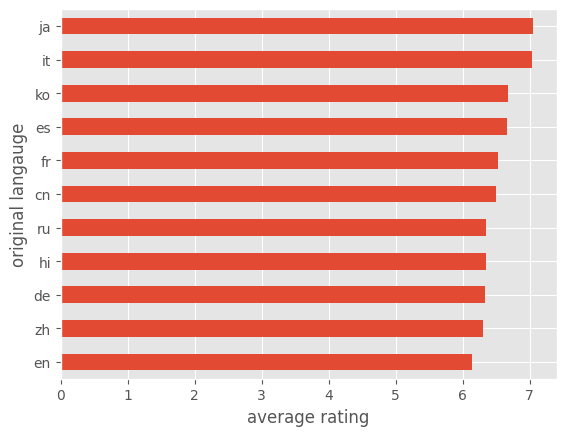

In [23]:

# display mean rating across different genres
df = o_df
df = df[df['vote_average'] != 0]

average_rating = df.groupby(['original_language']) \
  .agg({'runtime': 'count', 'vote_average': 'mean'}) \
  .rename(columns={'runtime': 'count'})
average_rating = average_rating[average_rating['count'] > 10]
average_rating = average_rating['vote_average'].sort_values(ascending=True)
fig, axs  = plt.subplots()
average_rating.plot(y='vote_average', ax=axs, kind='barh')
axs.set_xlabel('average rating')
axs.set_ylabel('original langauge')
plt.show()

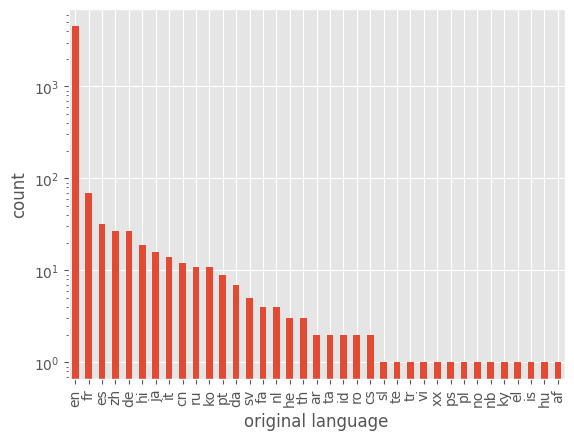

In [221]:

df = o_df

average_rating = df.groupby(['original_language'])['vote_average'].count()
average_rating = average_rating.sort_values(ascending=False)
fig, axs  = plt.subplots()
average_rating.plot(y='vote_average', ax=axs, kind='bar')
axs.set_ylabel('count')
axs.set_yscale('log')
axs.set_xlabel('original language')
plt.show()

value
15th century      2
16th century      3
17th century      3
18th century      7
1910s             4
                 ..
 strange noise    1
Γη                1
卧底肥妈              1
绝地奶霸              1
超级妈妈              1
Name: vote_average, Length: 9793, dtype: int64


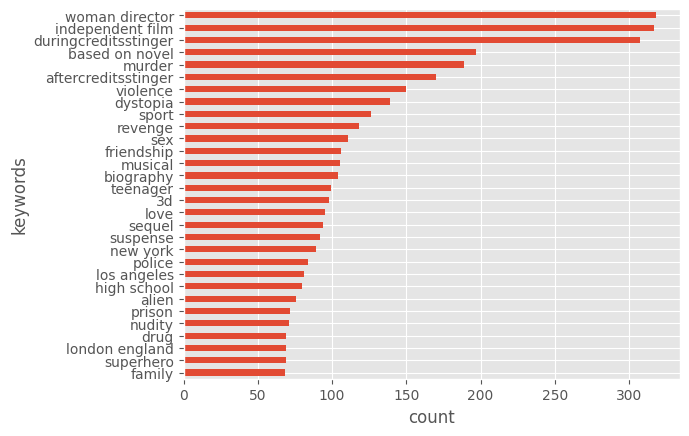

In [133]:
# display mean rating across different genres
df = o_df
df = df[df['vote_average'] != 0]

def f(t):
  s = t['keywords']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

keyword_split = pd.DataFrame.apply(df, f, axis=1)
df = pd.concat([df, keyword_split], axis=1)
df = df.melt(id_vars=['vote_average'],
                value_vars=keyword_split.columns)
# print(df)
average_rating = df.groupby(['value'])['vote_average'].count()
print(average_rating)
average_rating = average_rating.sort_values(ascending=False)
average_rating = average_rating.head(30)
average_rating = average_rating.sort_values()
fig, axs  = plt.subplots()
average_rating.plot( ax=axs, kind='barh')
axs.set_xlabel('count')
axs.set_ylabel('keywords')
plt.show()

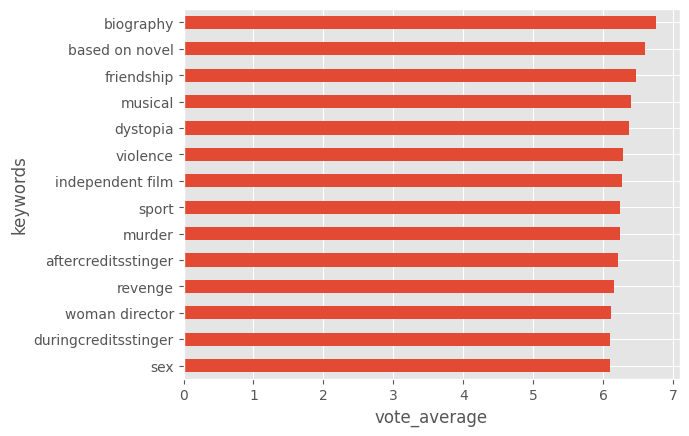

In [9]:
# display mean rating across different keywords
df = o_df

df = df[df['vote_average'] != 0]

def f(t):
  s = t['keywords']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

keyword_split = pd.DataFrame.apply(df, f, axis=1)
df = pd.concat([df, keyword_split], axis=1)
df = df.melt(id_vars=['vote_average', 'runtime'],
                value_vars=keyword_split.columns)
# print(df)
average_rating = df.groupby(['value']).agg({'vote_average': 'mean', 'runtime': 'count'}).rename(columns={'runtime':'count'})
average_rating = average_rating[average_rating['count'] > 100]
average_rating = average_rating['vote_average']
# print(average_rating)
average_rating = average_rating.sort_values(ascending=False)
average_rating = average_rating.head(30)
average_rating = average_rating.sort_values()
fig, axs  = plt.subplots()
average_rating.plot( ax=axs, kind='barh')
axs.set_xlabel('vote_average')
axs.set_ylabel('keywords')
plt.show()

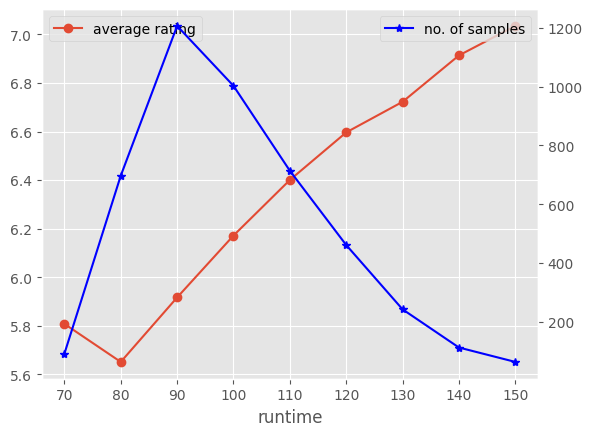

In [43]:
import re
df = o_df
df = df.loc[df['runtime'] != 0].loc[df['vote_average'] != 0]

ma = df['runtime'].max()
mi = df['runtime'].min()
n = 10
df = df.groupby(pd.cut(df['runtime'], range(int(mi // n) * n, int(ma // n) * n, n)),observed=False)\
  .agg({'vote_average': 'mean', 'revenue': 'count'}).rename(columns={'revenue': 'count'})
df = df[df['count'] > 50]
t = df['count']
df = df['vote_average']
df.index = [re.match(r'\((\d+)', str(x)).group(1) for x in df.index]
# fig, axs = plt.subplots(1,2)
g = df.plot(kind='line', marker='o')

a2 = g.twinx()
t.index = df.index
t.plot(kind='line', ax=a2, color='blue', marker='*')
g.set_xlabel('runtime')
a2.grid(False)

g.legend(['average rating'])
a2.legend(['no. of samples'])

# df.plot(kind='line', marker='d', c='yellow')
# g.set_ylabel('average rating')

Text(0, 0.5, 'density')

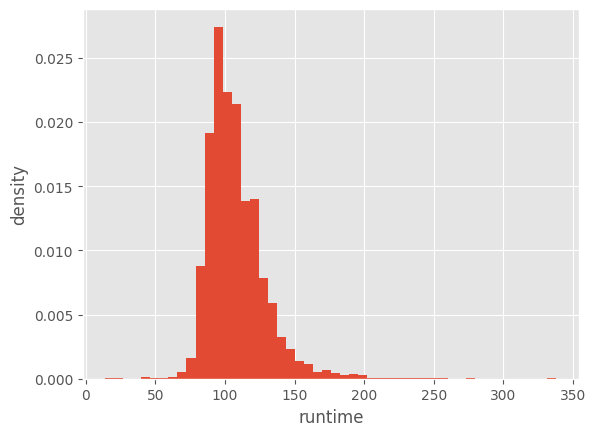

In [19]:
df = o_df

df = df[df['runtime'] != 0]

g = df['runtime'].hist(bins=50, density=True)
g.set_xlabel('runtime')
g.set_ylabel('density')

2787965087 0


Text(0.5, 0, 'revenue')

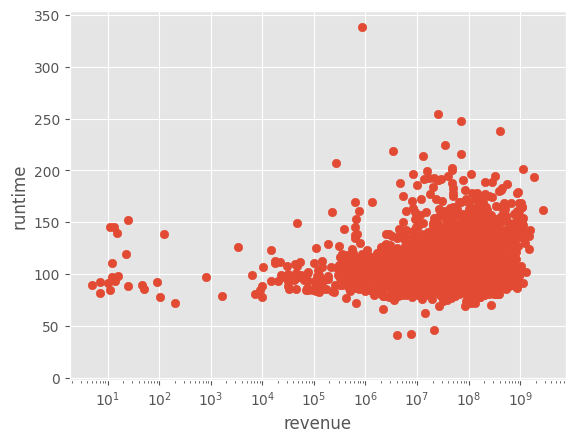

In [34]:
import re
df = o_df

df = df.loc[df['runtime'] != 0]

ma = df['revenue'].max()
mi = df['revenue'].min()


# df['revenue'] = np.log(df['revenue'])


print(ma, mi)
n = 100_000_000
# df = df.groupby(pd.cut(df['revenue'], range(int(mi // n) * n, int(ma // n) * n, n)))['runtime'].mean()
# df.index = [re.match(r'\((\d+)', str(x)).group(1) for x in df.index]
# print(df.head(4))
plt.scatter(x=df['revenue'], y=df['runtime'])
g = plt.gca()
g.set_xscale('log')
g.set_ylabel('runtime')
g.set_xlabel('revenue')

816960000 0
0-1e7    6.220670
1-2e7    6.370364
2-3e7    6.318216
3-4e7    6.430714
Name: vote_average, dtype: float64


C:\Users\rhyth\AppData\Local\Temp\ipykernel_6440\1514523257.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(pd.cut(df['revenue'], range(int(mi // n) * n, int(ma // n) * n, n)))['vote_average'].mean()


Text(0.5, 0, 'revenue')

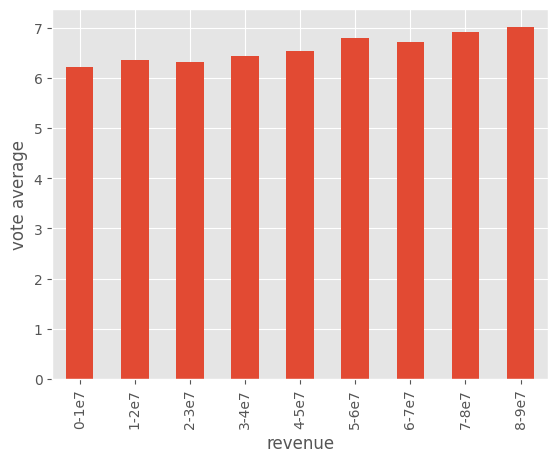

In [3]:
df = o_df

df = df[df['vote_average'] != 0]

df = df.sort_values('revenue')[50:-50]

ma = df['revenue'].max() // 10000 * 10000
mi = df['revenue'].min() // 10000 * 10000

print(ma, mi)
bins = 10
n = (ma - mi) //bins

df = df.groupby(pd.cut(df['revenue'], range(int(mi // n) * n, int(ma // n) * n, n)))['vote_average'].mean()

df.index = [f'{(mi + i*n) // n}-{(mi + (i + 1)*n) // n}e{int(np.log10(n)//1)}' for i in range(len(df.index))]
print(df.head(4))
g = df.plot(kind='bar')
g.set_ylabel('vote average')
g.set_xlabel('revenue')

155000000 850000
850000      3.342002e+07
8557500     5.234117e+07
16265000    6.206056e+07
23972500    7.622143e+07
Name: revenue, dtype: float64


C:\Users\rhyth\AppData\Local\Temp\ipykernel_24856\1049114054.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['budget'] != 0][df['revenue'] != 0]
C:\Users\rhyth\AppData\Local\Temp\ipykernel_24856\1049114054.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(pd.cut(df['budget'], range(int(mi // n) * n, int(ma // n) * n, n)))['revenue'].mean()


Text(0.5, 0, 'budget')

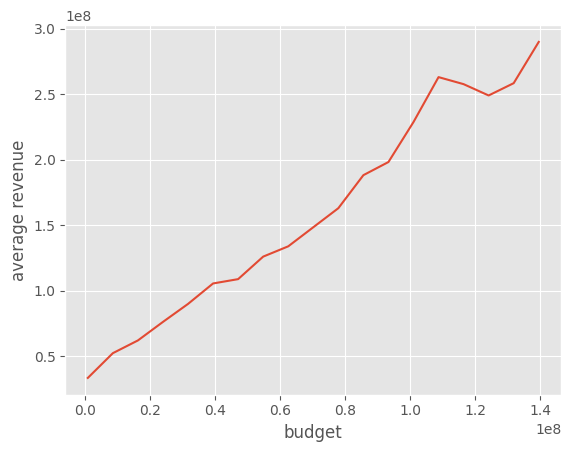

In [31]:
df = o_df

df = df[df['budget'] != 0][df['revenue'] != 0] 

df = df.sort_values('budget')[100:-100]
df = df.sort_values('revenue')[100:-100]

ma = df['budget'].max()
mi = df['budget'].min()

print(ma, mi)

bins = 20

n = (ma - mi) // bins

df = df.groupby(pd.cut(df['budget'], range(int(mi // n) * n, int(ma // n) * n, n)))['revenue'].mean()

df.index = [(mi + i*n) for i in range(len(df.index))]

print(df.head(4))
g = df.plot(kind='line')
g.set_ylabel('average revenue')
g.set_xlabel('budget')

155000000 300000
0-1e6    14.306436
1-2e6    18.204431
2-3e6    20.568355
3-4e6    23.412254
Name: popularity, dtype: float64


C:\Users\rhyth\AppData\Local\Temp\ipykernel_6440\1747000580.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(pd.cut(df['budget'], range(int(mi // n) * n, int(ma // n) * n, n)))['popularity'].mean()


Text(0.5, 0, 'budget')

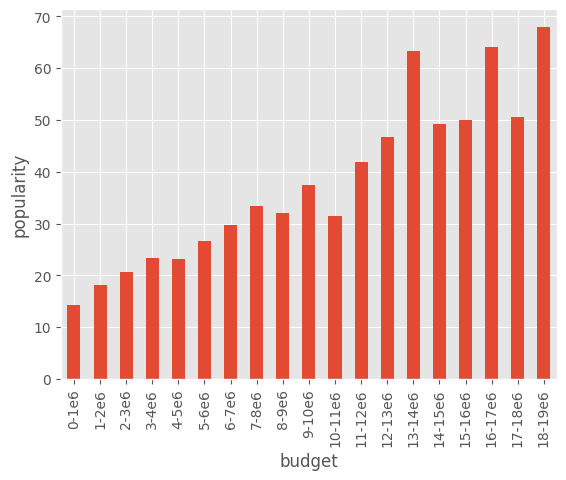

In [4]:
df = o_df

df= df.loc[df['budget']  != 0]
df = df.sort_values('budget')[100:-100]

ma = df['budget'].max()
mi = df['budget'].min()


print(ma, mi)
bins = 20
n = (ma - mi) // bins

df = df.groupby(pd.cut(df['budget'], range(int(mi // n) * n, int(ma // n) * n, n)))['popularity'].mean()

df.index = [f'{(mi + i*n) // n}-{(mi + (i + 1)*n) // n}e{int(np.log10(n) // 1)}' for i in range(len(df.index))]

print(df.head(4))
g =df.plot(kind='bar')
g.set_ylabel('popularity')
g.set_xlabel('budget')

C:\Users\rhyth\AppData\Local\Temp\ipykernel_10916\3715564648.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(pd.cut(df['vote_average'], range(11)))['popularity'].mean()


Text(0, 0.5, 'popularity')

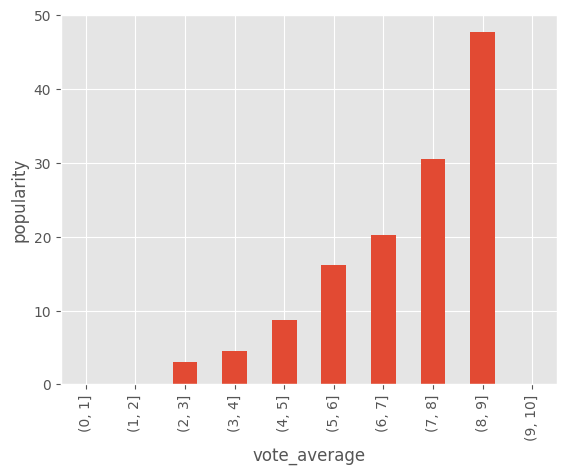

In [38]:
df = o_df

df = df[df['vote_average'] != 0]

df = df.sort_values('vote_average')[10: -10]
df = df.sort_values('popularity')[100:-100]

fig, axs = plt.subplots()

df = df.groupby(pd.cut(df['vote_average'], range(11)))['popularity'].mean()

df.plot(kind='bar', ax=axs)
axs.set_ylabel('popularity')

C:\Users\rhyth\AppData\Local\Temp\ipykernel_24856\3972667437.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['budget'] > n][df['revenue'] > n][df['vote_average'] != 0]
C:\Users\rhyth\AppData\Local\Temp\ipykernel_24856\3972667437.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['budget'] > n][df['revenue'] > n][df['vote_average'] != 0]


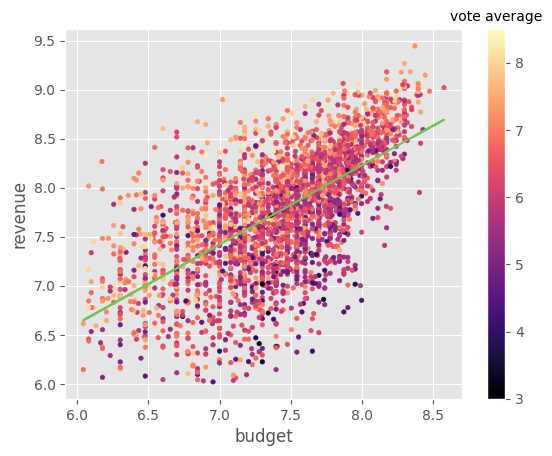

In [30]:
df = o_df
n = 10_00_000
# filtering the data
df = df[df['budget'] > n][df['revenue'] > n][df['vote_average'] != 0]
x = df['budget']
y = df['revenue']

# setting the logarithmic scale
x = np.log10(x)
y = np.log10(y)

# calculating the regression line
m, b = np.polyfit(x, y, 1)
ax = plt.gca()
out = ax.scatter(x, y, c=df['vote_average'], s=10, cmap='magma')
clb = plt.colorbar(out, ax=ax)
clb.ax.set_title('vote average', fontsize=10)

ax.set_xlabel('budget')
ax.set_ylabel('revenue')
ax.plot(x, m*x + b, c='#74c451')
# fig, axs = plt.subplots()
# axs.hist(df['vote_average'], density=True)

C:\Users\rhyth\AppData\Local\Temp\ipykernel_19012\3808108697.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['vote_average'] > 2 ][df['popularity'] > n]
C:\Users\rhyth\AppData\Local\Temp\ipykernel_19012\3808108697.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=10, cmap='magma')


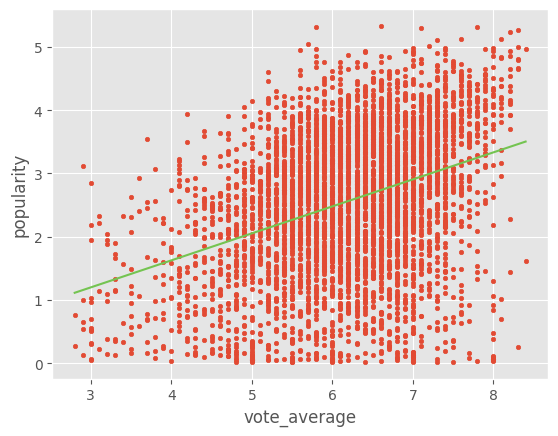

In [195]:
import seaborn as sns
from matplotlib import colormaps
df = o_df
n = 0.2
n = 0
k = 8
# filtering the data
df = df[df['vote_average'] > 2 ][df['popularity'] > n]
df = df.sort_values('popularity', ascending=False)[k:-k]
df = df.sort_values('vote_average', ascending=False)[k:-k]
x = df['vote_average']
y = df['popularity']

# setting the logarithmic scale
y = np.log1p(y)

# calculating the regression line
m, b = np.polyfit(x, y, 1)
ax = plt.gca()
ax.scatter(x, y, s=10, cmap='magma')


ax.set_xlabel('vote_average')
ax.set_ylabel('popularity')
ax.plot(x, m*x + b, c='#74c451')

# fig, axs = plt.subplots()
# axs.hist(df['vote_average'], density=True)

C:\Users\rhyth\AppData\Local\Temp\ipykernel_8636\1000598746.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'average rating')

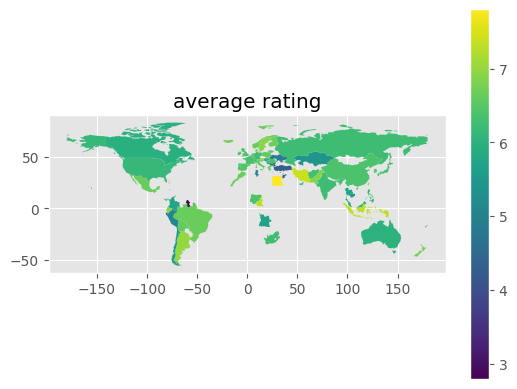

In [41]:
import geopandas
df = o_df

df = df[df['vote_average'] != 0]
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
def f(t):
  s = t['production_countries']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

country_split = pd.DataFrame.apply(df, f, axis=1)
df = pd.concat([df, country_split], axis=1)
df = df.melt(id_vars=['id', 'title', 'vote_average'],
                value_vars=country_split.columns)
df = df.groupby(['value'])['vote_average'].mean()
df = df.sort_index(ascending=False).rename('name')
df = pd.DataFrame(df, columns=['average_rating', 'name'])
df['average_rating'] = df['name']
df['name'] = df.index
world = world.merge(df)
# world.plot()
world.head(5)
# world.plot()
g= world.plot('average_rating', legend=True)
g.set_title('average rating')

C:\Users\rhyth\AppData\Local\Temp\ipykernel_8636\3301563160.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'no. of movies')

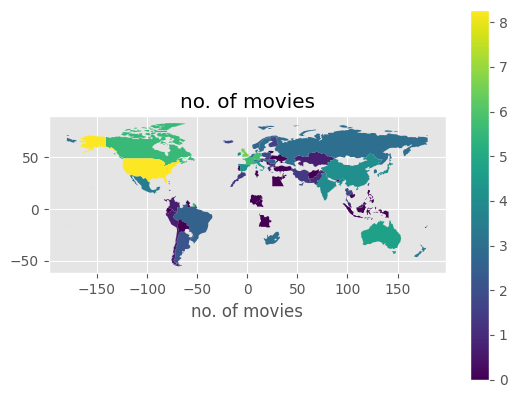

In [40]:
import geopandas

df = o_df

df = df[df['vote_average'] != 0]
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
def f(t):
  s = t['production_countries']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

country_split = pd.DataFrame.apply(df, f, axis=1)
df = pd.concat([df, country_split], axis=1)
df = df.melt(id_vars=['id', 'title', 'vote_average'],
                value_vars=country_split.columns)
df = df.groupby(['value'])['vote_average'].count()
df = df.sort_index(ascending=False).rename('name')
df = pd.DataFrame(df, columns=['average_rating', 'name'])
df['average_rating'] = np.log(df['name'])
df['name'] = df.index
world = world.merge(df)
# world.plot()
world.head(5)
# world.plot()
g = world.plot('average_rating', legend=True)
g.set_title('no. of movies')

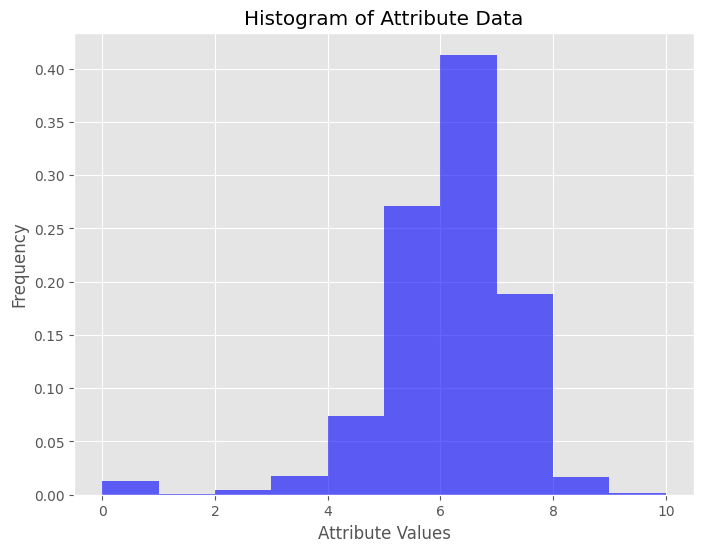

Shapiro-Wilk Test:
Test Statistic: 0.8621311232494561
p-value: 5.304060311163094e-54
Null hypothesis (data follows a normal distribution) can be rejected.

Kolmogorov-Smirnov Test:
Test Statistic: 0.9809968163695512
p-value: 0.0
Null hypothesis (data follows a normal distribution) can be rejected.


In [15]:
from scipy.stats import shapiro, kstest, norm
import matplotlib.pyplot as plt

# Example attribute data (replace with your actual attribute data)
attribute_data = df['vote_average']
df = o_df

# Visual inspection: Histogram
plt.figure(figsize=(8, 6))
plt.hist(attribute_data, bins=10, density=True, alpha=0.6, color='b')
plt.title('Histogram of Attribute Data')
plt.xlabel('Attribute Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Statistical tests
# Shapiro-Wilk Test
shapiro_test_statistic, shapiro_p_value = shapiro(attribute_data)
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)
if shapiro_p_value < 0.05:
    print("Null hypothesis (data follows a normal distribution) can be rejected.")
else:
    print("No significant evidence to reject the null hypothesis.")

# Kolmogorov-Smirnov Test
ks_test_statistic, ks_p_value = kstest(attribute_data, 'norm')
print("\nKolmogorov-Smirnov Test:")
print("Test Statistic:", ks_test_statistic)
print("p-value:", ks_p_value)
if ks_p_value < 0.05:
    print("Null hypothesis (data follows a normal distribution) can be rejected.")
else:
    print("No significant evidence to reject the null hypothesis.")
